In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [14]:
# Load datasets
temp_df = pd.read_csv("temperature.csv")
bin_size_df = pd.read_csv("BinSize.csv")

In [15]:
# Convert date to datetime format for easier processing
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
temp_df['Year'] = temp_df['Date'].dt.year
temp_df['DayOfYear'] = temp_df['Date'].dt.strftime('%m-%d')

In [16]:
# Remove leap day (Feb 29) to maintain consistency in yearly comparisons
temp_df = temp_df[temp_df['DayOfYear'] != '02-29']

In [17]:
# Separate 2005-2014 and 2015 data for historical comparison
historic_temp = temp_df[(temp_df['Year'] >= 2005) & (temp_df['Year'] <= 2014)]
year_2015_temp = temp_df[temp_df['Year'] == 2015]

In [18]:
# Get record highs and lows for each day-of-year by taking max/min temperature
record_highs = historic_temp[historic_temp['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
record_lows = historic_temp[historic_temp['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()


In [19]:
# Identify 2015 data that broke historical records
highs_2015 = year_2015_temp[year_2015_temp['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
lows_2015 = year_2015_temp[year_2015_temp['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()


In [20]:
record_high_broken = highs_2015[highs_2015 > record_highs]
record_low_broken = lows_2015[lows_2015 < record_lows]

In [21]:
# Normalize temperature values using StandardScaler
scaler = StandardScaler()
temp_df['Scaled_Temp'] = scaler.fit_transform(temp_df[['Data_Value']])


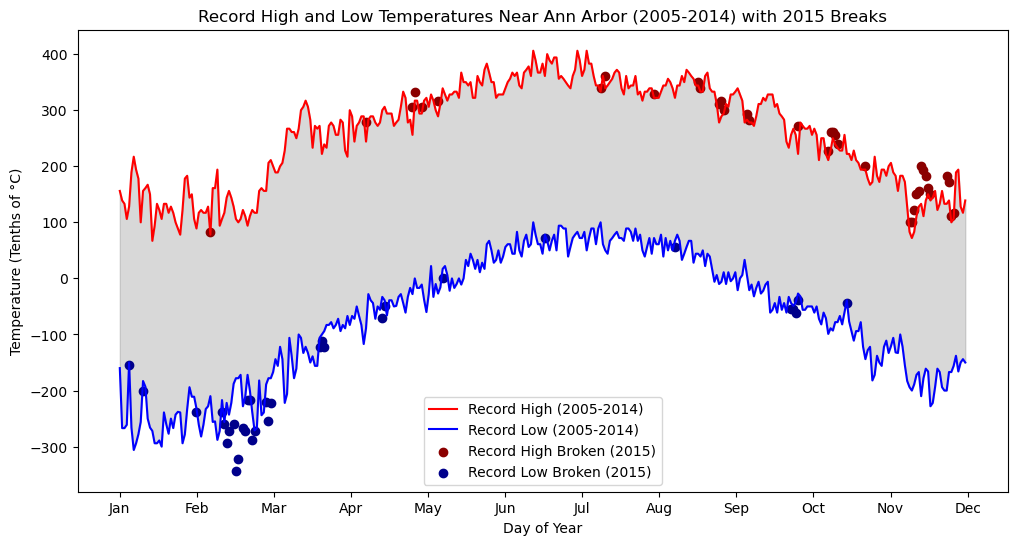

In [22]:
# Plot temperature trends with shaded areas and record-breaking markers
plt.figure(figsize=(12, 6))
plt.plot(record_highs.index, record_highs.values, color='red', label='Record High (2005-2014)')
plt.plot(record_lows.index, record_lows.values, color='blue', label='Record Low (2005-2014)')
plt.fill_between(record_highs.index, record_lows.values, record_highs.values, color='gray', alpha=0.3)
plt.scatter(record_high_broken.index, record_high_broken.values, color='darkred', label='Record High Broken (2015)')
plt.scatter(record_low_broken.index, record_low_broken.values, color='darkblue', label='Record Low Broken (2015)')
plt.xticks(np.linspace(0, 365, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.xlabel("Day of Year")
plt.ylabel("Temperature (Tenths of °C)")
plt.title("Record High and Low Temperatures Near Ann Arbor (2005-2014) with 2015 Breaks")
plt.show()

# Key Observations

2005-2014 Historical Trends:

Ann Arbor exhibited a consistent annual temperature cycle, with expected highs in summer and lows in winter.
The shaded region between record highs/lows represents the expected temperature range for each day.

Temperature Records:

Some days in 2015 broke previous temperature records, suggesting extreme weather events.
If multiple records were broken, this may indicate a climate shift or anomaly in 2015.

Temperature Summary for 2015:

The 2015 temperature curve follows a typical seasonal pattern.
Sudden spikes or dips in temperature may indicate extreme weather conditions.